In [1]:
from datautils import load
df = load()

In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df.describe()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
count,1166835.0,1166835,1166835,1166835.0,1166835,1166835.0,1166835,1166835,1166835
unique,200153.0,425,425,39901.0,3,3254.0,5,195,217686
top,2209265.0,2016-08-08 00:00:00,2016-08-10 00:00:00,47499.0,desktop,9924.0,Gondal,Cobra Island,3635431_3
freq,172.0,9672,9549,11242.0,753860,277775.0,536036,137791,48
first,NaN,2015-12-31 00:00:00,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-02-27 00:00:00,2017-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


- 3 Device Classes
- 5 Booker Countries out of 195
- Dates from 31/12/2015 - 28/02/2017
- 39901 unique cities
- 3254 affiliates

### Hotel Country - Booker Country Correlation

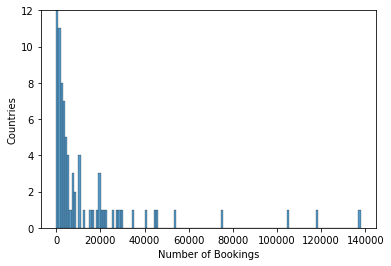

In [4]:
g = sns.histplot(Counter(df['hotel_country']))
g.set(ylim = (0,12), xlabel = 'Number of Bookings', ylabel = 'Countries')
plt.show()

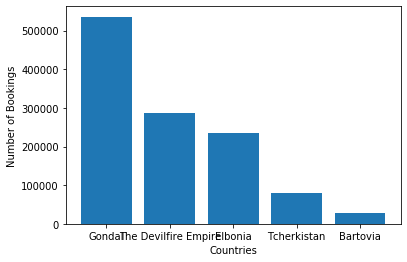

In [5]:
c = Counter(df['booker_country'])
fig = plt.bar(c.keys(), c.values())
plt.xlabel('Countries')
plt.ylabel('Number of Bookings')
plt.show()

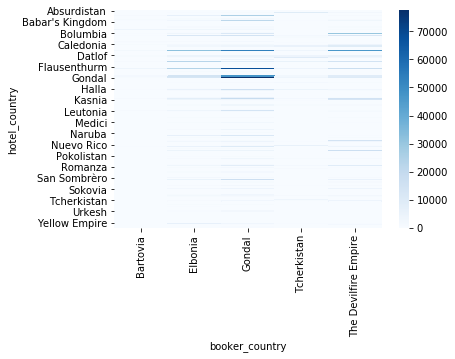

In [16]:
booker_to_hotel = df.pivot_table(index='hotel_country', columns='booker_country', values='utrip_id', aggfunc=len).fillna(0)
sns.heatmap(booker_to_hotel, cmap="Blues")
plt.show()

### Day of Week and Length of Trip

In [7]:
df['trip_length'] = (df['checkout'] - df['checkin']).dt.days
df['checkin_day'], df['checkout_day'] = df['checkin'].dt.dayofweek, df['checkout'].dt.dayofweek

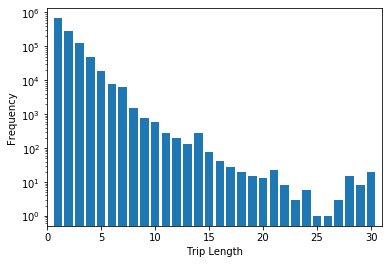

In [8]:
c = Counter(df['trip_length'])
x = range(min(c)-1, max(c)+2)
y = [c[i] for i in x]
plt.bar(x, y, log=True)
plt.xlim(min(x), max(x))
plt.xlabel('Trip Length')
plt.ylabel('Frequency')
plt.show()

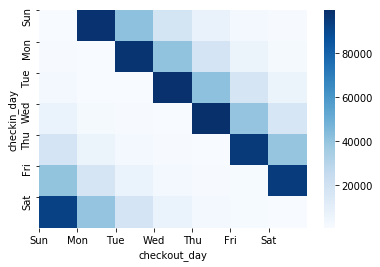

In [17]:
dow = df.pivot_table(index='checkin_day', columns='checkout_day', values='utrip_id', aggfunc=len).fillna(0)
sns.heatmap(dow, cmap="Blues")
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.yticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

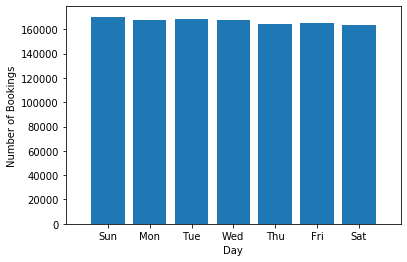

In [10]:
c = Counter(df['checkin_day'])

plt.bar(range(7), [c[x] for x in range(7)])
plt.xlabel('Day')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlim(-1, 7)
plt.ylabel('Number of Bookings')
plt.show()

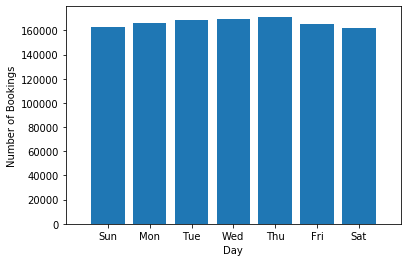

In [11]:
c = Counter(df['checkout_day'])

plt.bar(range(7), [c[x] for x in range(7)])
plt.xlabel('Day')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlim(-1, 7)
plt.ylabel('Number of Bookings')
plt.show()

### Number of Bookings per Trip

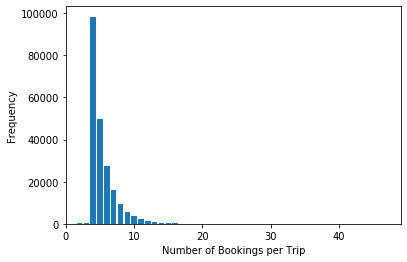

In [12]:
c = Counter(df.groupby('utrip_id').count()['user_id'])
x = range(min(c)-1, max(c)+2)
y = [c[i] for i in x]
plt.bar(x, y)
plt.xlim(min(x), max(x))
plt.xlabel('Number of Bookings per Trip')
plt.ylabel('Frequency')
plt.show()

### Affiliates by Hotel / Booker Country

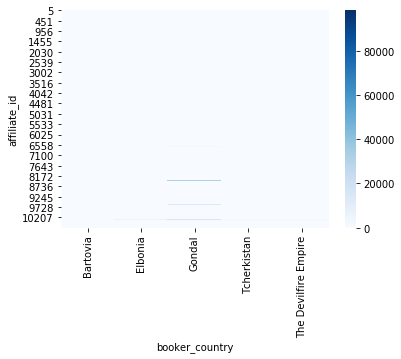

In [18]:
aff_to_booker = df.pivot_table(index='affiliate_id', columns='booker_country', values='utrip_id', aggfunc=len).fillna(0)
sns.heatmap(aff_to_booker, cmap="Blues")
plt.show()

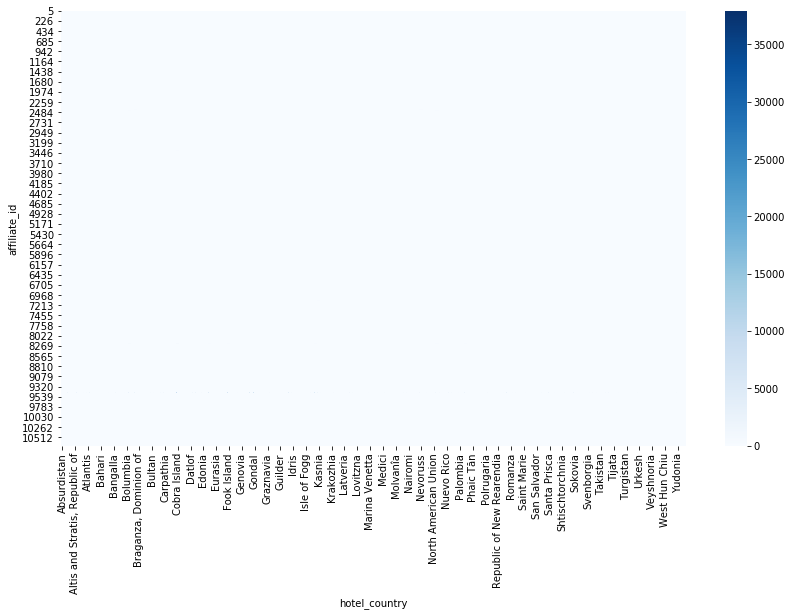

In [29]:
aff_to_hotel = df.pivot_table(index='affiliate_id', columns='hotel_country', values='utrip_id', aggfunc=len).fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(aff_to_hotel, cmap="Blues")
plt.show()

### Cities Most Visited

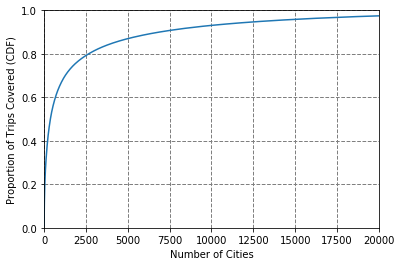

In [26]:
c = Counter(df['city_id'])
city_trips = list(sorted(c.values(), reverse=True))
city_trips_cdf = np.cumsum(city_trips) / sum(city_trips)

plt.plot(city_trips_cdf)
plt.xlim(0, 20000)
plt.ylim(0, 1)
plt.xlabel('Number of Cities')
plt.ylabel('Proportion of Trips Covered (CDF)')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()